In [18]:
import pandas as pd
import numpy as npC
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'volumfe', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-5')[:5]:
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-5/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

2020-06-01.csv
2020-06-02.csv
2020-06-03.csv
2020-06-04.csv
2020-06-05.csv


In [19]:
data = data.rename(columns={'Open':'open', 'High':'High', 'Low':'low', 'Close':'closingprice'})

In [20]:
from finta import TA

In [21]:
TA.SMM(data, period=42, column='Closingprice')

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
284    9778.90
285    9778.90
286    9778.90
287    9780.10
288    9781.25
Name: 42 period SMM, Length: 1445, dtype: float64

In [15]:
data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'volumfe',
       'WeightedPrice', 'Volume(BTC)', 'Volume(Currency)', 'Change',
       'PerChange'],
      dtype='object')

In [4]:
t = (1,2)

In [10]:
t = list(t)
t[0] = 3
t

[3, 2]

In [19]:
from functools import wraps


class Wrapper:
    def __init__(self):
        self.transforms = {}
        self.transforms["t"] = "test"

    def __getattr__(self, attr):
        func = getattr(tt, attr)
        @wraps(func)
        def _wrapped(*args, **kwargs):
            
            print("wrap")
            
            return func(*args, **kwargs)
        return _wrapped

    
def tt(t):
    print("hello")

In [20]:
w = Wrapper()

In [22]:
tt('t')

hello


In [ ]:
delta = data['Close'].diff()[:14]

In [63]:
up, down = delta.copy(), delta.copy()


In [64]:
up[up < 0] = 0
down[down > 0] = 0

In [65]:
_gain = up.ewm(alpha=1.0/14, adjust=True).mean()
_loss = down.abs().ewm(alpha=1.0/14, adjust=True).mean()

In [66]:
RS = _gain / _loss

In [67]:
RS

0          NaN
1     0.000000
2     0.000000
3     0.998000
4     0.922150
5     0.774280
6     0.446230
7     0.945377
8     0.515375
9     0.489773
10    0.658196
11    0.807568
12    0.796584
13    1.006522
Name: Close, dtype: float64

In [68]:
x = pd.Series(100 - (100 / (1 + RS)))

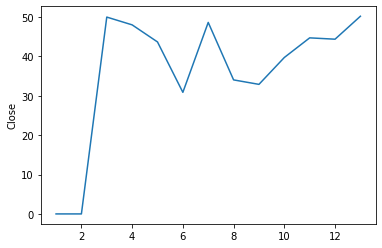

In [69]:
import seaborn as sns

sns.lineplot(x=range(len(x)), y=x)

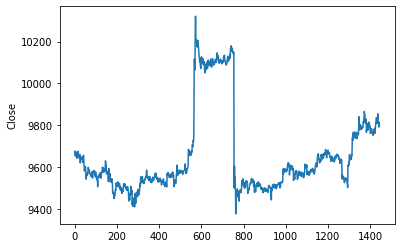

In [61]:
sns.lineplot(x=range(len(data['Close'])), y=data['Close'])